# Install TODS

In [1]:
import warnings
warnings.filterwarnings("ignore")

!pip install -e git+https://github.com/datamllab/tods.git@dev#egg=tods 

Obtaining tods from git+https://github.com/datamllab/tods.git@dev#egg=tods
  Updating ./src/tods clone (to revision dev)
  Running command git fetch -q --tags
  Running command git reset --hard -q feb0c9c48b750c1dc4b9d60b5884b93d7824e77b
  Preparing metadata (setup.py) ... done
  Attempting uninstall: tods
    Found existing installation: tods 0.0.2
    Uninstalling tods-0.0.2:
      Successfully uninstalled tods-0.0.2
  DEPRECATION: Legacy editable install of tods from git+https://github.com/datamllab/tods.git@dev#egg=tods (setup.py develop) is deprecated. pip 25.0 will enforce this behaviour change. A possible replacement is to add a pyproject.toml or enable --use-pep517, and use setuptools >= 64. If the resulting installation is not behaving as expected, try using --config-settings editable_mode=compat. Please consult the setuptools documentation for more information. Discussion can be found at https://github.com/pypa/pip/issues/11457
  Running setup.py develop for tods


In [1]:
import numpy as np
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_covtype
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.io import arff
import sklearn as sk
import time
from sklearn.datasets import fetch_openml

from tods.sk_interface.detection_algorithm.OCSVM_skinterface import OCSVMSKI
from tods.sk_interface.detection_algorithm.KNN_skinterface import KNNSKI

2024-09-27 20:56:16.864573: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-09-27 20:56:16.864589: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# df = pd.read_csv('./Data/multivariate/Occupancy/room-occupancy-0.test.csv')
df = pd.read_csv('./Data/multivariate/CalIt2/CalIt2-traffic.test.csv')
df.drop(["timestamp"], axis = 1, inplace = True)
df.head()

,in_count,out_count,is_anomaly
0,0,0,0
1,0,1,0
2,0,0,0
3,0,0,0
4,0,0,0


In [3]:
print(df.columns[:-1]) #feature_names

Index(['in_count', 'out_count'], dtype='object')


In [4]:
def remove_files_from_directory(directory):
    # Get all files in the directory
    files = glob.glob(os.path.join(directory, "*"))
    
    # Loop through the files and remove each one
    for file in files:
        if os.path.isfile(file):
            os.remove(file)
    
    print(f"All files in {directory} have been removed.")

In [5]:
feature_folder = 'features'
remove_files_from_directory(feature_folder)
os.makedirs(feature_folder, exist_ok=True)

All files in features have been removed.


In [6]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Further split X_train and y_train into 7 subsets
num_sets = 7
X_train_sets = np.array_split(X_train, num_sets)
y_train_sets = np.array_split(y_train, num_sets)

# Create y_label_sets to hold the set number (0 to 6)
y_label_sets = [np.full(y_set.shape, i) for i, y_set in enumerate(y_train_sets)]
set_numbers = np.concatenate(y_label_sets)

# Displaying the shapes of the resulting subsets
for i in range(num_sets):
    print(f"Set {i + 1}:")
    print(f"X_train_set shape: {X_train_sets[i].shape}, y_train_set shape: {y_train_sets[i].shape}")
    print("=" * 40)

(4032, 2) (1008, 2) (4032,) (1008,)
Set 1:
X_train_set shape: (576, 2), y_train_set shape: (576,)
Set 2:
X_train_set shape: (576, 2), y_train_set shape: (576,)
Set 3:
X_train_set shape: (576, 2), y_train_set shape: (576,)
Set 4:
X_train_set shape: (576, 2), y_train_set shape: (576,)
Set 5:
X_train_set shape: (576, 2), y_train_set shape: (576,)
Set 6:
X_train_set shape: (576, 2), y_train_set shape: (576,)
Set 7:
X_train_set shape: (576, 2), y_train_set shape: (576,)


importances [0.48836329 0.51163671] 0
important_features ['out_count', 'in_count']
X_train_class [[0 0]
 [1 0]
 [0 0]
 ...
 [2 2]
 [3 3]
 [2 0]]
Shape of X_train_class: (576, 2)
y_train_class 0      0
1      0
2      0
3      0
4      0
      ..
571    0
572    0
573    0
574    0
575    0
Name: is_anomaly, Length: 576, dtype: int64
0 importance list:
0 
            importance
Features             
out_count    0.511637
in_count     0.488363 



0=["out_count","in_count",


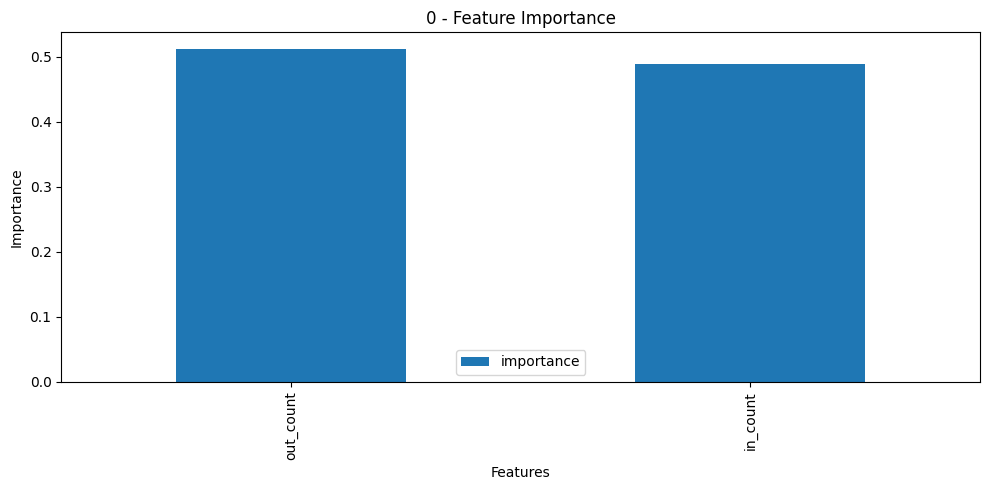

-----------------------------------------------------------------------------------------------




importances [0.64490531 0.35509469] 1
important_features ['in_count', 'out_count']
X_train_class [[0 0]
 [0 0]
 [0 0]
 ...
 [0 1]
 [0 0]
 [0 0]]
Shape of X_train_class: (576, 2)
y_train_class 576     0
577     0
578     0
579     0
580     0
       ..
1147    0
1148    0
1149    0
1150    0
1151    0
Name: is_anomaly, Length: 576, dtype: int64
1 importance list:
1 
            importance
Features             
in_count     0.644905
out_count    0.355095 



1=["in_count","out_count",


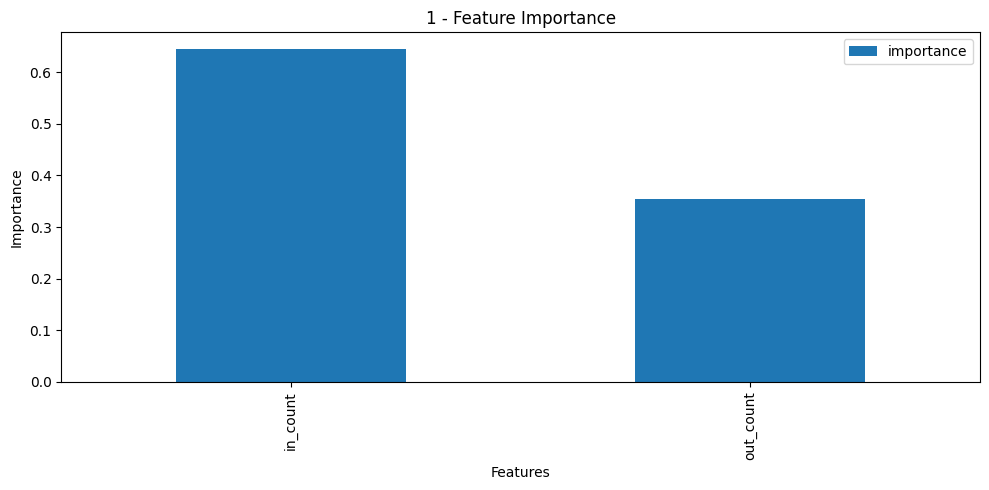

-----------------------------------------------------------------------------------------------




importances [0.60899169 0.39100831] 2
important_features ['in_count', 'out_count']
X_train_class [[0 0]
 [0 1]
 [0 0]
 ...
 [0 1]
 [0 0]
 [0 0]]
Shape of X_train_class: (576, 2)
y_train_class 1152    0
1153    0
1154    0
1155    0
1156    0
       ..
1723    0
1724    0
1725    0
1726    0
1727    0
Name: is_anomaly, Length: 576, dtype: int64
2 importance list:
2 
            importance
Features             
in_count     0.608992
out_count    0.391008 



2=["in_count","out_count",


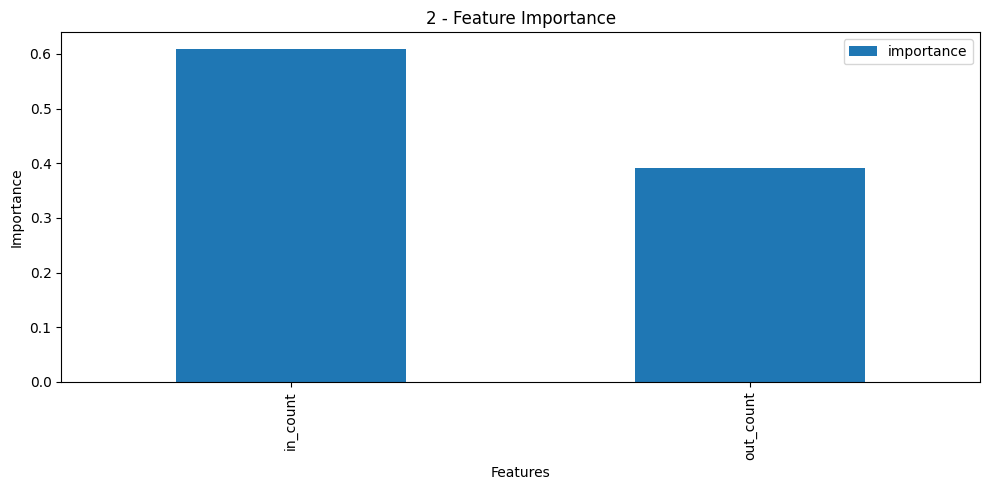

-----------------------------------------------------------------------------------------------




importances [0.52439673 0.47560327] 3
important_features ['in_count', 'out_count']
X_train_class [[0 3]
 [0 0]
 [0 0]
 ...
 [0 1]
 [0 0]
 [0 0]]
Shape of X_train_class: (576, 2)
y_train_class 1728    0
1729    0
1730    0
1731    0
1732    0
       ..
2299    0
2300    0
2301    0
2302    0
2303    0
Name: is_anomaly, Length: 576, dtype: int64
3 importance list:
3 
            importance
Features             
in_count     0.524397
out_count    0.475603 



3=["in_count","out_count",


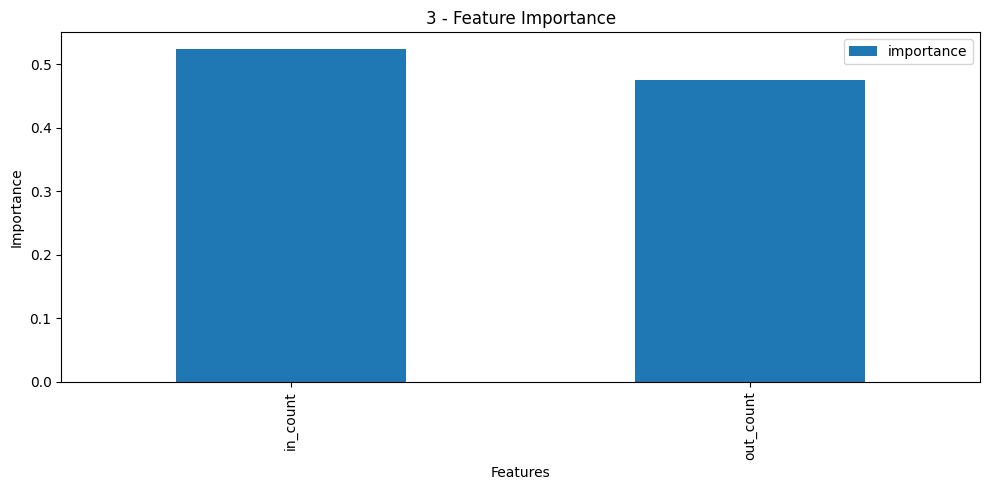

-----------------------------------------------------------------------------------------------




importances [0.49239733 0.50760267] 4
important_features ['out_count', 'in_count']
X_train_class [[0 0]
 [0 0]
 [0 0]
 ...
 [2 1]
 [1 0]
 [2 0]]
Shape of X_train_class: (576, 2)
y_train_class 2304    0
2305    0
2306    0
2307    0
2308    0
       ..
2875    0
2876    0
2877    0
2878    0
2879    0
Name: is_anomaly, Length: 576, dtype: int64
4 importance list:
4 
            importance
Features             
out_count    0.507603
in_count     0.492397 



4=["out_count","in_count",


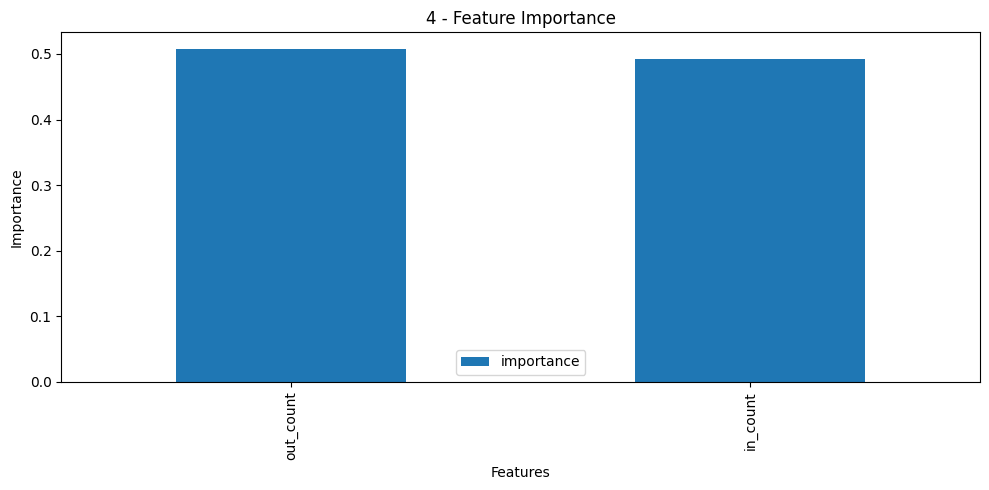

-----------------------------------------------------------------------------------------------




importances [0.66405005 0.33594995] 5
important_features ['in_count', 'out_count']
X_train_class [[0 1]
 [0 0]
 [2 0]
 ...
 [0 0]
 [0 1]
 [0 0]]
Shape of X_train_class: (576, 2)
y_train_class 2880    0
2881    0
2882    0
2883    0
2884    0
       ..
3451    0
3452    0
3453    0
3454    0
3455    0
Name: is_anomaly, Length: 576, dtype: int64
5 importance list:
5 
            importance
Features             
in_count      0.66405
out_count     0.33595 



5=["in_count","out_count",


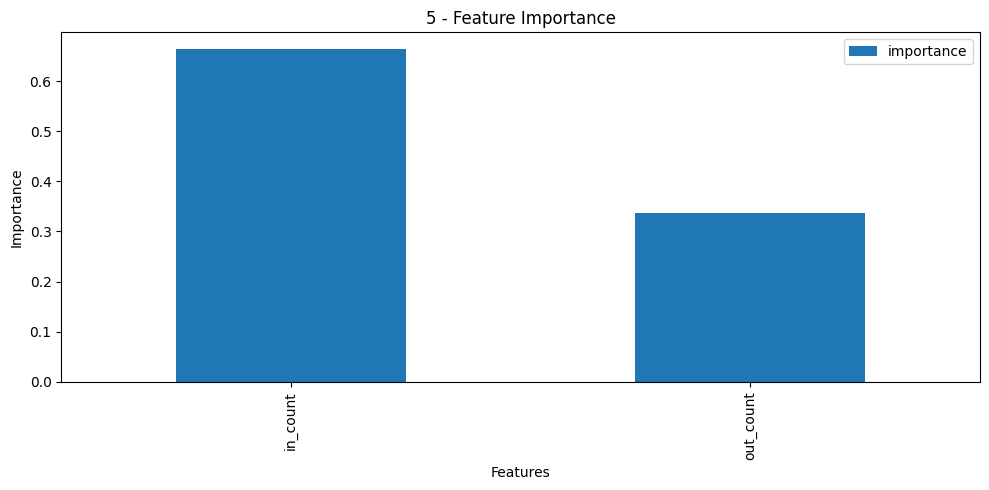

-----------------------------------------------------------------------------------------------




importances [0.55472781 0.44527219] 6
important_features ['in_count', 'out_count']
X_train_class [[0 3]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 1]]
Shape of X_train_class: (576, 2)
y_train_class 3456    0
3457    0
3458    0
3459    0
3460    0
       ..
4027    0
4028    0
4029    0
4030    0
4031    0
Name: is_anomaly, Length: 576, dtype: int64
6 importance list:
6 
            importance
Features             
in_count     0.554728
out_count    0.445272 



6=["in_count","out_count",


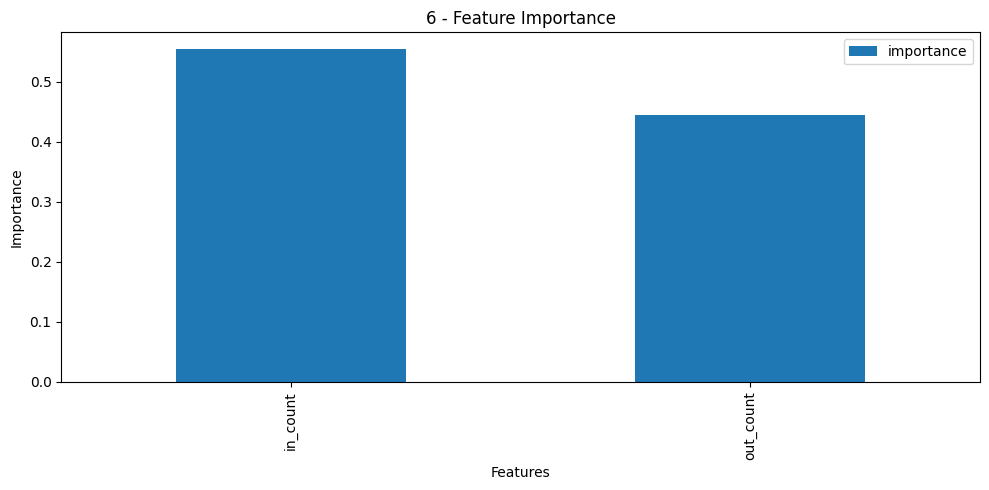

-----------------------------------------------------------------------------------------------




feature_importances {0: ['out_count', 'in_count'], 1: ['in_count', 'out_count'], 2: ['in_count', 'out_count'], 3: ['in_count', 'out_count'], 4: ['out_count', 'in_count'], 5: ['in_count', 'out_count'], 6: ['in_count', 'out_count']}
mission accomplished!
Total operation time: =  1.9323279857635498 seconds


In [7]:
seconds = time.time()

ths = open("importance_list.csv", "w")
feature_importances = {}
SVMs = {}

for i, (X_set, y_set) in enumerate(zip(X_train_sets, y_train_sets)):
    #computing the feature importances
    forest = sk.ensemble.RandomForestRegressor(n_estimators=250,random_state=0)
    forest.fit(X_set, y_set)
    importances = forest.feature_importances_
    print('importances', importances, i)
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]
    num_features = len(importances)
    num_display = min(num_features, 20)  # Only display up to the maximum available features
    refclasscol=list(df.columns.values)
    impor_bars = pd.DataFrame({'Features':refclasscol[0:num_display],'importance':importances[0:num_display]})
    impor_bars = impor_bars.sort_values('importance',ascending=False)
    important_features = impor_bars['Features'].to_list()[:5]
    impor_bars = impor_bars.set_index('Features')
    print('important_features', important_features)
    feature_importances[i] = important_features
    
    svm = OCSVMSKI()
    X_train_class = np.array(X_set.iloc[:, X_set.columns.get_indexer(important_features)])
    print('X_train_class', X_train_class)
    if isinstance(X_train_class, np.ndarray):
        print("Shape of X_train_class:", X_train_class.shape)
    else:
        print("X_train_class is not a numpy array.")
    y_train_class = y_set
    print('y_train_class', y_train_class)
    if len(y_train_class) > 0:  # Ensure there are samples for this class
        svm.fit(X_train_class)
    else:
        print(f'no data for {i}')
    SVMs[i] = svm
    
    plt.rcParams['figure.figsize'] = (10, 5)
    impor_bars.plot.bar();
    #printing the feature importances  
    count=0
    fea_ture=str(i)+"=["
    for j in impor_bars.index:
        fea_ture=fea_ture+"\""+str(j)+"\","
        count+=1
        if count==5:
            fea_ture=fea_ture[0:-1]+"]"
            break     
    print(i,"importance list:")
    print(i,"\n",impor_bars.head(20),"\n\n\n")
    print(fea_ture)
    plt.title(str(i)+" - Feature Importance")
    plt.ylabel('Importance')
    plt.savefig(os.path.join(feature_folder, str(i)+".pdf"),bbox_inches='tight', format = 'pdf')
    ths.write((  fea_ture ) )
    plt.tight_layout()
    plt.show()
    print("-----------------------------------------------------------------------------------------------\n\n\n\n")

print('feature_importances', feature_importances)
print("mission accomplished!")
print("Total operation time: = ",time.time()- seconds ,"seconds")
ths.close()



In [8]:
# TEST_COUNT = 100

# Step 1: Train KNN to classify
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, set_numbers)

# Step 2: Predict classes for the test set
knn_predictions = knn.predict(np.array(X_test))
print('knn_predictions', knn_predictions)

knn_predictions [3 0 0 ... 0 0 0]


In [9]:
# y_test = y_test[:TEST_COUNT]
# print("KNN Evaluation:")
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, knn_predictions))
# print(confusion_matrix(y_test, knn_predictions))
# print("\nClassification Report:")
# print(classification_report(y_test, knn_predictions))
# print("Accuracy:", accuracy_score(y_test, knn_predictions))

In [10]:
svm_predictions = []

for i in range(X_test.shape[0]):
    # test_instance = X_test.iloc[i]
    predicted_label = knn_predictions[i]
    # print('predicted_label', predicted_label)
    selected_features = feature_importances[predicted_label]
    # print('selected_features', selected_features)
    svm_model = SVMs[predicted_label]
    
    test_instance_selected = X_test.iloc[i, X.columns.get_indexer(selected_features)].values.reshape(1, -1)
    # print('test_instance_selected', test_instance_selected)
    
    svm_prediction = svm_model.predict(np.array(test_instance_selected))
    # print(svm_prediction)
    svm_predictions.append(svm_prediction)

In [11]:
# print("y_true:", y_test.values)
svm_predictions_flattened = np.array([pred[0, 0] for pred in svm_predictions])
# print("y_pred:", svm_predictions_flattened)

print("Confusion Matrix:")
print(confusion_matrix(y_test.values, svm_predictions_flattened))
print("\nClassification Report:")
print(classification_report(y_test.values, svm_predictions_flattened))
print("Accuracy:", accuracy_score(y_test.values, svm_predictions_flattened))

# Optionally, you can also compute the overall accuracy
# overall_accuracy = accuracy_score(y_test, np.concatenate((svm_predictions, knn_predictions[~anomaly_mask])))
# print("\nOverall Accuracy:", overall_accuracy)

Confusion Matrix:
[[832 144]
 [ 18  14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91       976
           1       0.09      0.44      0.15        32

    accuracy                           0.84      1008
   macro avg       0.53      0.64      0.53      1008
weighted avg       0.95      0.84      0.89      1008

Accuracy: 0.8392857142857143
